### Github doesn't render plotly graphs so the same at nbviewer:

### https://nbviewer.jupyter.org/github/futileresistance/ds_tings/blob/master/fifa18_visualisation.ipynb

import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
fifa_df = pd.read_csv('fifa18_.csv')

In [5]:
def fix(x):
    # evaluate sum
    if('+' in str(x).strip()):
        calc = x.split('+')
        return int(calc[0]) + int(calc[1])
    # evaluate subtraction
    elif('-' in str(x).strip()):
        calc = x.split('-')
        return int(calc[0]) + int(calc[1])
    # convert to integer if string contains a valid number
    elif str(x).strip().isdigit():
        return int(x)
    # return as it is, for example null values
    else:
         return x
        
for column in fifa_df.iloc[:,11:74]:
    fifa_df[column] = fifa_df[column].apply(fix)

In [6]:
#Convert wages and values to floats
def str_to_float(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value

fifa_df['Wage'] = fifa_df['Wage'].apply(str_to_float)

fifa_df.info()

### How players' charasteristics depend on their age

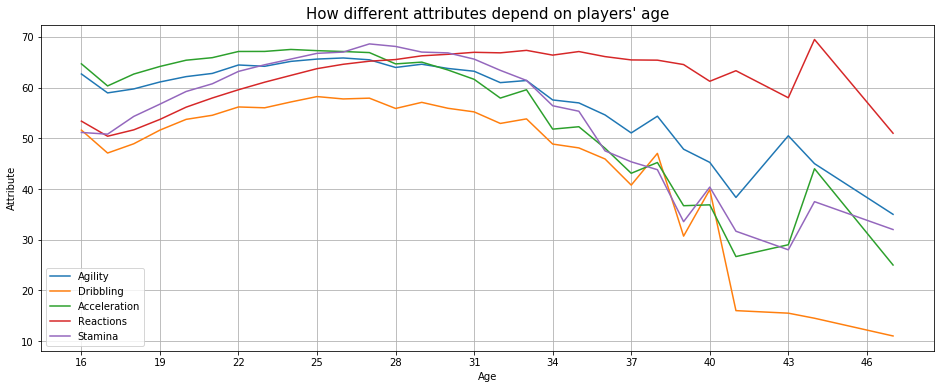

In [10]:
plt.figure(figsize=(16,6))
attributes = ["Agility", "Dribbling", "Acceleration", "Reactions", "Stamina"]
for attribute in attributes:
    plt.plot(fifa_df.groupby('Age').agg({attribute: 'mean'}), label=attribute)
plt.xticks(range(16,48,3))
plt.title("""How different attributes depend on players' age""", fontdict={'fontsize': 15})
plt.xlabel('Age')
plt.ylabel('Attribute')
plt.grid()
plt.legend()

### Do top 10 clubs in free kick accuracy have also high heading accuracy?

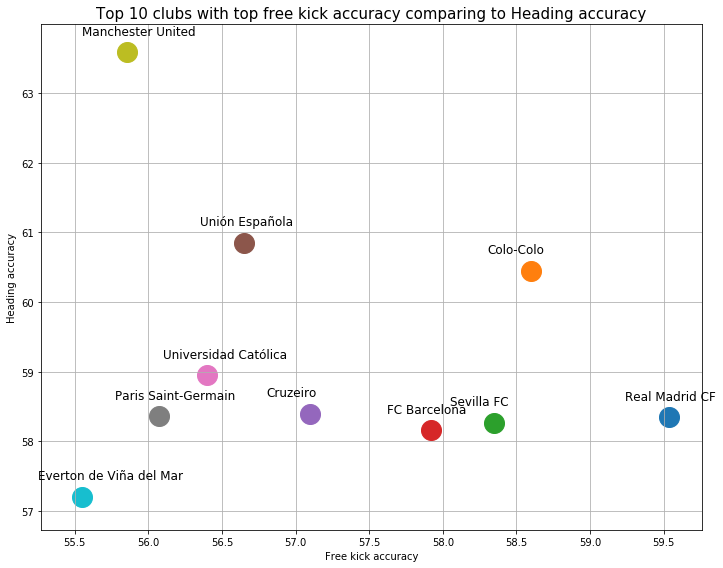

In [114]:
plt.figure(figsize=(10,8))
clubs = fifa_df.groupby('Club').agg({'Free kick accuracy': 'mean', 'Heading accuracy': 'mean', })\
[['Free kick accuracy', 'Heading accuracy']].sort_values('Free kick accuracy', ascending=False).iloc[:10]
club_names = clubs.index.ravel()
for i,type in enumerate(club_names):
    x = clubs['Free kick accuracy'][i]
    y = clubs['Heading accuracy'][i]
    plt.scatter(x, y, marker='o', s = 400)
    plt.text(x-0.3, y+0.25, type, fontsize=12)
plt.title('Top 10 clubs with top free kick accuracy comparing to Heading accuracy', fontdict={'fontsize': 15})
plt.xlabel('Free kick accuracy')
plt.ylabel('Heading accuracy')
plt.tight_layout()
plt.grid()

### On which positions players tend to have high composure rating? Does it depend on age?

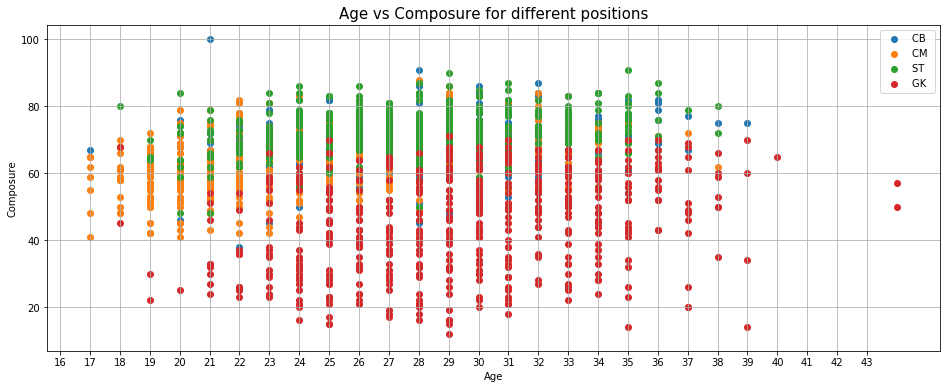

In [86]:
plt.figure(figsize=(16,6))
positions = ['CB ', 'CM ', 'ST ', 'GK ']
for position in positions:
    x = fifa_df[fifa_df['Preferred Positions'] == position][['Composure','Age']].iloc[:500]
    plt.scatter(x.Age, x.Composure, label=position)
plt.xticks(range(16,44,1))
plt.title('Age vs Composure for different positions', fontdict={'fontsize': 15})
plt.xlabel('Age')
plt.ylabel('Composure')
plt.grid()
plt.legend()

### How club's mean value grows with its overall rating?

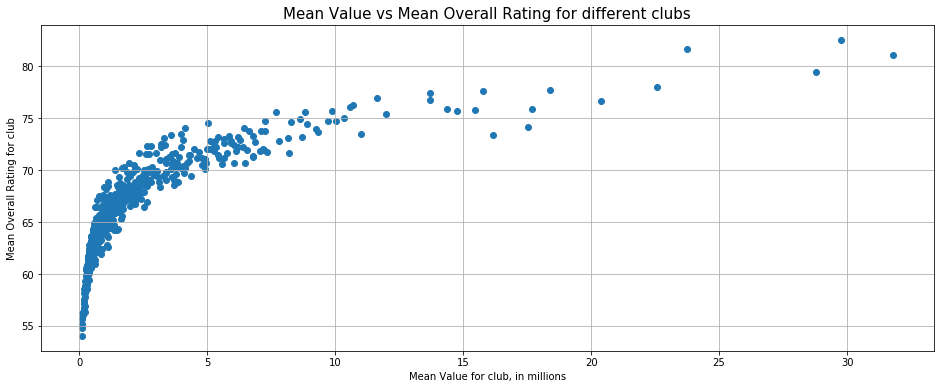

In [140]:
plt.figure(figsize=(16,6))
clubs = fifa_df.groupby('Club').agg({'Value':'mean', 'Overall': 'mean', 'Age': 'mean', 'Club': 'count'})
plt.title('Mean Value vs Mean Overall Rating for different clubs', fontdict={'fontsize': 15})
plt.ylabel('Mean Overall Rating for club')
plt.xlabel('Mean Value for club, in millions')
plt.grid()
plt.scatter(clubs.Value/1000000, clubs.Overall)

### How player's wage depends on age?

In [31]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
plotly.offline.init_notebook_mode(connected=True)
wages = fifa_df.groupby('Age').agg({'Wage':'mean'})['Wage']

layout = go.Layout(
        title='Wage vs Age',
    xaxis=dict(
        title='Age',
        titlefont=dict(
        family='Arial',
        size=18,
        color='#000')
    ),
    yaxis=dict(
        showgrid=True,
        ticks='',
        showticklabels=False,
        title='Wage',
        titlefont=dict(
        family='Arial',
        size=18,
        color='#000')
    )
)

plotly.offline.iplot({
    "data": [go.Bar(x=wages.index, y=wages)],
    "layout": go.Layout(layout)
})

### How strength correlates with aggression in different countries?

In [32]:
aggro = fifa_df.groupby('Nationality').agg({'Aggression': 'mean', 'Strength': 'mean'})[['Aggression', 'Strength']]

layout = go.Layout(
        title='Observing aggression & strength ratings for countries',
        xaxis=dict(
        #title='Age',
        titlefont=dict(
        family='Arial',
        size=18,
        color='#000')
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=5,
        ticklen=3,
        tickwidth=3,
        #showgrid=True,
        showticklabels=True,
        title='Aggression',
        titlefont=dict(
        family='Arial',
        size=18,
        color='#000')
    )
)

plotly.offline.iplot({
    "data": [go.Scatter(x=aggro.index, y=aggro.Aggression, mode = 'markers',\
                              marker={'size': aggro.Strength, 'color': aggro.Strength})],
    "layout": go.Layout(layout)
})